In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import math

# Read in data
#Cloud_Sections
cs = pd.read_csv('CLOUD_SECTIONS_Cleaned.csv', delimiter = ',', encoding = 'latin1')
#Designed_Pipe_Center
desP = pd.read_csv('DESIGNED_Pipe_Centers_Cleaned.csv', delimiter = ',', encoding = 'latin1')
#Planes_Local_Global_Cleaned
p_info = pd.read_csv('Planes_Local_Global_Cleaned.csv', delimiter = ',', encoding = 'latin1')

In [2]:
TuplePairsBySection = [] #A List of sections, where each section is a list of tuples, and each tuple is the XY coordinates of a point on the point cloud
CenterList = [] #A list of the Designed Center points and radius, each object in the list is a panda dataframe where there are as many rows as pipes
for n in range(cs.Section.nunique()): #for n in the number of distinct sections
    grab = cs[cs["Section"] == "Section-{" + str(n) + "}"] #grabs all dataframe rows in each distinct section
    TuplePairsBySection.append(list(zip(grab.X, grab.Y))) #adds the individual X and Y points in each point cloud pair for the nth section
    CenterList.append(desP[desP["Section"] == "Section-{" + str(n) + "}"]) #adds the dataframe rows in each distinct section

[(14.65, 44.56), (14.17, 43.33), (61.61, 59.48), (14.45, 44.45), (14.92, 45.03), (14.37, 43.62), (14.05, 42.2), (14.92, 44.96), (14.37, 43.97), (58.5, 69.35), (13.98, 42.39), (12.4, 40.77), (60.87, 60.03), (14.13, 47.14), (58.78, 62.92), (61.97, 59.21), (14.05, 42.95), (58.19, 64.98), (14.17, 43.22), (14.92, 44.84), (14.92, 45.24), (14.92, 45.11), (13.98, 42.55), (13.5, 41.53), (61.14, 59.77), (59.25, 70.78), (13.9, 42.47), (13.78, 41.8), (14.29, 43.5), (14.33, 46.81), (11.42, 40.34), (14.17, 43.14), (59.88, 60.98), (13.7, 41.73), (60.94, 59.96), (68.11, 58.33), (62.83, 58.74), (63.58, 58.41), (63.94, 58.34), (62.24, 59.01), (63.39, 58.53), (64.37, 58.26)]
       Section          X          Y  Z      R
0  Section-{0}  65.408948  63.690596  0  8.000
1  Section-{0}  10.082133  41.693907  0  4.375


In [15]:
N = 1.25 #arbitrary radius multiplier
PassesFirstNoiseTestBySection = [] #A List of points in the point cloud, by section and pipe, that pass the first noise test
FailsFirstNoiseTestBySection = [] #A List of points in the point cloud, by section, that fail the first noise test
count = 0 
for section in TuplePairsBySection:
    D, E, F = [], [], []
    r1, r2 = CenterList[count].iloc[0,4], CenterList[count].iloc[1,4] #intialize the radius for both pipes
    c1, c2 = tuple(CenterList[count].iloc[0,1:3]), tuple(CenterList[count].iloc[1,1:3]) #intialize the center XY coordinate tuple for both pipes
    for p in section: #for point in Section
        if math.dist(c1, p) < (r1 * N): #test first pipe
            D.append(p)
        elif math.dist(c2, p) < (r2 * N): #test second pipe
            E.append(p)
        else:
        	F.append(p)
    PassesFirstNoiseTestBySection.append(D)
    PassesFirstNoiseTestBySection.append(E)
    FailsFirstNoiseTestBySection.append(F)
    count += 1

Circle 3 from Section 1 has no values at radius multiplier 1.25.


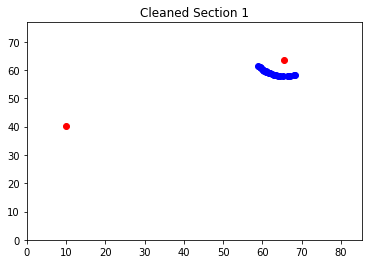

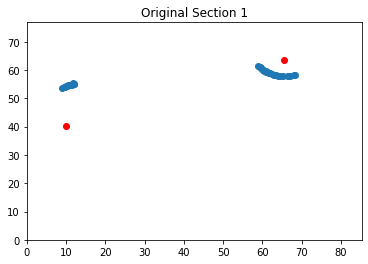

       Section          X          Y  Z      R
4  Section-{2}  65.408948  63.688344  0  8.000
5  Section-{2}  10.082130  39.285477  0  4.375
[(8.98, 53.67), (9.53, 54.06), (9.68, 54.14), (10.0, 54.3), (10.12, 54.39), (10.31, 54.45), (10.59, 54.62), (10.98, 54.78), (11.3, 54.78), (11.42, 54.78), (11.77, 54.93), (11.81, 55.53), (11.97, 55.06), (11.97, 55.21), (58.98, 61.49), (59.29, 61.03), (59.37, 60.94), (59.57, 60.66), (59.65, 60.58), (60.04, 60.19), (60.12, 60.1), (60.2, 60.03), (60.51, 59.76), (60.79, 59.52), (60.87, 59.45), (61.02, 59.36), (61.1, 59.29), (61.54, 58.97), (61.69, 58.88), (61.85, 58.8), (62.48, 58.49), (62.83, 58.33), (62.99, 58.3), (63.39, 58.14), (63.98, 57.98), (64.45, 57.9), (65.2, 57.82), (66.42, 57.82), (66.5, 57.83), (67.09, 57.89), (68.11, 58.14), (68.19, 58.21)]


In [16]:
#CHECK FIRST TEST SUCCESS
NUM = 1 #Section checked
#print("With radius multiplier of " + str(N))

#Cleaned Section
plt.title("Cleaned Section " + str(NUM))
plt.xlim(0, max(x[0] for x in TuplePairsBySection[NUM]) * 1.25)
plt.ylim(0, max(y[1] for y in TuplePairsBySection[NUM]) * 1.25)
if len(PassesFirstNoiseTestBySection[2 * NUM]) > 0: #Section 1 circle 3 workaround
    plt.scatter(*zip(*PassesFirstNoiseTestBySection[2 * NUM]), color = "blue") #Circle saved as D
else: 
    print("Circle " + str(2 * NUM) + " from Section " + str(NUM) + " has no values at radius multiplier " + str(N) +".")
if len(PassesFirstNoiseTestBySection[2 * NUM + 1]) > 0: #Section 1 circle 3 workaround
    plt.scatter(*zip(*PassesFirstNoiseTestBySection[2 * NUM + 1]), color = "green")  #Circle saved as E
else: 
    print("Circle " + str(2 * NUM + 1) + " from Section " + str(NUM) + " has no values at radius multiplier " + str(N) +".")
plt.scatter(CenterList[NUM].X, CenterList[NUM].Y, color = "red")
plt.show()

#Original Section
plt.title("Original Section " + str(NUM))
plt.xlim(0, max(x[0] for x in TuplePairsBySection[NUM]) * 1.25)
plt.ylim(0, max(y[1] for y in TuplePairsBySection[NUM]) * 1.25)
plt.scatter(*zip(*TuplePairsBySection[NUM]))
plt.scatter(CenterList[NUM].X, CenterList[NUM].Y, color = "red")
plt.show()

In [ ]:
count = 0
SecCount = 0
for circle in PassesFirstNoiseTestBySection:
    if len(circle) == 0:
        print("Circle " +str(count)+ " of Section " +str(SecCount)+ " has no points at the given radius multiplier of " +str(N)+ ".")
    if count%2 == 1:
        SecCount += 1
    count += 1

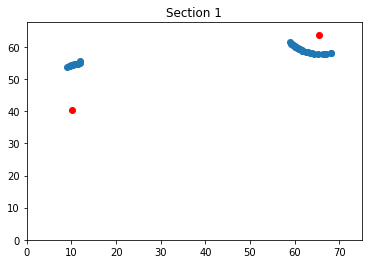

In [13]:
#Visualize Sections
"""count = 0
for C in TuplePairsBySection:
    if count == 1:
        plt.title("Section " + str(count))
        plt.xlim(0, max(x[0] for x in C) * 1.1)
        plt.ylim(0, max(y[1] for y in C) * 1.1)
        plt.scatter(*zip(*C))
        plt.scatter(CenterList[count].X, CenterList[count].Y, color = "red")
        #a = plt.Circle((CenterList[count].iloc[0,1],CenterList[count].iloc[0,2]),radius = CenterList[count].iloc[0,4]*1.05,color = "red")
        #plt.gca().add_artist(a)
        #b = plt.Circle((CenterList[count].iloc[1,1],CenterList[count].iloc[1,2]),radius = CenterList[count].iloc[1,4]*1.05,color = "red")
        #plt.gca().add_artist(b)
        plt.show()
    count += 1
    if count > 1:
        break
#print(CenterList[1])
#print(sorted(TuplePairsBySection[1]))
"""